## Lab Assignment: Exploratory Data Analysis
Student:     **MICHAEL KAMP**

### Objective: To gain an understanding of exploratory data analysis (EDA) techniques and their application using Pandas, Pandas Profiling, and Matplotlib.

### Instructions:

1. Load the dataset titanic.csv using Pandas and display the first 5 rows.
2. Calculate the summary statistics of the dataset and display them.
3. Visualize the distribution of the target variable using a bar chart.
4. Visualize the distribution of the target variable by class using a stacked bar chart.
5. Plot a histogram to visualize the distribution of age.
6. Create a scatter plot to visualize the relationship between age and fare.
7. Use Pandas profiling to generate a detailed report of the dataset.
8. Identify and visualize any missing values in the dataset.
9. Identify and visualize any outliers in the dataset.
10. Identify and visualize any correlations between variables in the dataset.

### Deliverable:
Modify this notebook to include the python code as well as any documentation related to your submission.  Submit the notebook as your response in Blackboard.

### Grading Criteria:

Your lab assignment will be graded based on the following criteria:

- Correctness of the implementation
- Proper use of basic control structures and functions
- Code efficiency
- Clarity and readability of the code
- Compliance with the instructions and deliverables.

### Dataset
The dataset to be used for this lab assignment is the Titanic dataset, which contains information about passengers on the Titanic, including their demographics, ticket information, and survival status. The dataset can be downloaded from Kaggle: https://www.kaggle.com/c/titanic/data

You can load the dataset using the following code:

In [1]:
import pandas as pd, seaborn as sns
titanic = sns.load_dataset("titanic")
print("✅ Dataset loaded:", titanic.shape)

titanic.count()


✅ Dataset loaded: (891, 15)


survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

Student Submission:

In [2]:
import ydata_profiling
print(ydata_profiling.__version__)


v4.17.0


In [3]:
import sys
print(sys.executable)


C:\Users\kampm\anaconda3\envs\data747_env\python.exe


1. Load the dataset titanic.csv using Pandas and display the first 5 rows.

In [4]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport  # may need: pip install pandas-profiling

# Load Titanic dataset from Seaborn
titanic = sns.load_dataset("titanic")

# Optional: verify dataset loaded
titanic.count()

# 1. Display first 5 rows
print("First 5 Rows:")
display(titanic.head())

First 5 Rows:


C:\Users\kampm\AppData\Local\Temp\ipykernel_16284\3174768522.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport  # may need: pip install pandas-profiling


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Calculate the summary statistics of the dataset and display them.   

In [5]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


3. Visualize the distribution of the target variable using a bar chart.

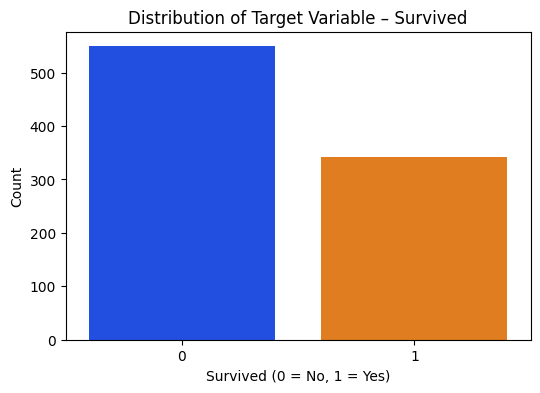

In [6]:
# 3. Visualize the distribution of the target variable (Survived)

import warnings
warnings.filterwarnings("ignore")  # hide future/deprecation warnings

plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=titanic, palette='bright')

plt.title("Distribution of Target Variable – Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


4. Visualize the distribution of the target variable by class using a stacked bar chart.

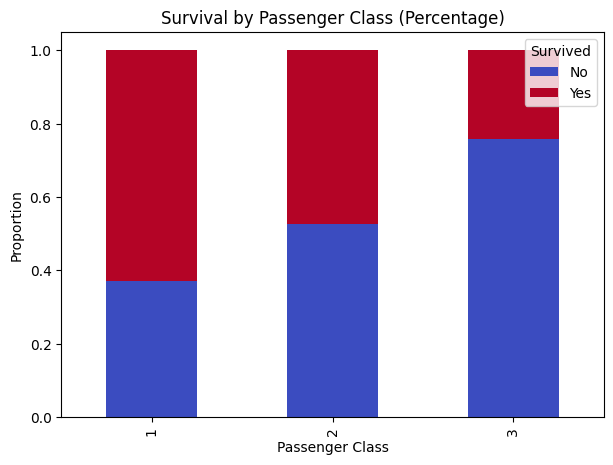

In [7]:
class_survival_pct = pd.crosstab(titanic["pclass"], titanic["survived"], normalize="index")

class_survival_pct.plot(kind="bar", stacked=True, figsize=(7,5), colormap="coolwarm")
plt.title("Survival by Passenger Class (Percentage)")
plt.xlabel("Passenger Class")
plt.ylabel("Proportion")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


5. Plot a histogram to visualize the distribution of age.

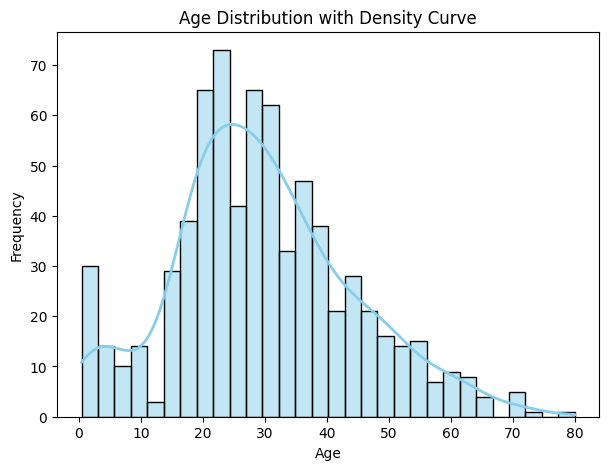

In [8]:
# 5. Histogram of Age (Enhanced visibility)

plt.figure(figsize=(7,5))
sns.histplot(
    data=titanic,
    x="age",
    bins=30,
    kde=True,
    color="skyblue",
    edgecolor="black",                 # adds clear bar edges
    line_kws={"color": "darkblue", "lw": 2}  # bold, dark KDE line
)

plt.title("Age Distribution with Density Curve")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


6. Create a scatter plot to visualize the relationship between age and fare.

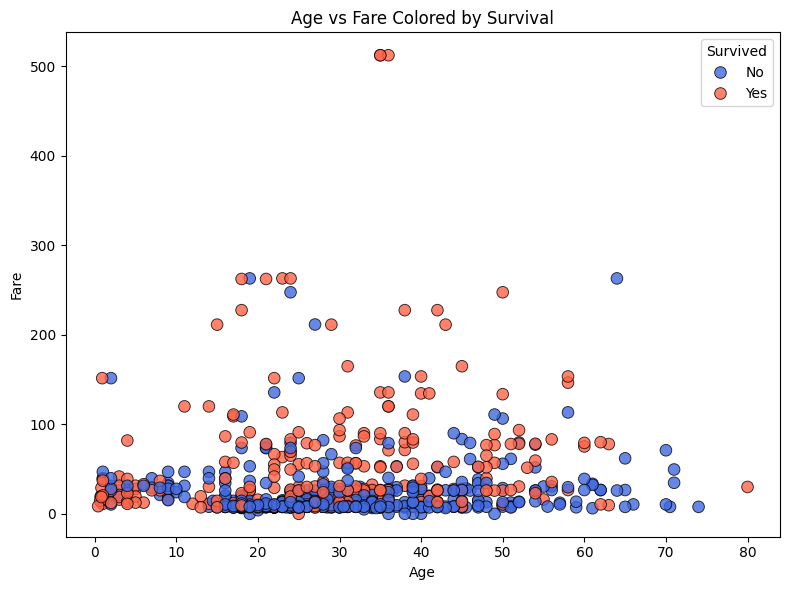

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=titanic,
    x="age",
    y="fare",
    hue=titanic["survived"].map({0: "No", 1: "Yes"}),  # categorical labels
    palette={"No": "royalblue", "Yes": "tomato"},      # explicit colors
    alpha=0.8,
    edgecolor="black",
    s=70
)

plt.title("Age vs Fare Colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived", loc="upper right", frameon=True)
plt.tight_layout()
plt.show()



7. Use Pandas profiling to generate a detailed report of the dataset.

In [ ]:
# 7. Permanently Embedded Profiling Report (for submission)

from ydata_profiling import ProfileReport
from IPython.display import IFrame, display, HTML   # ✅ make sure HTML is imported
import base64, os

# Generate the profiling report (lightweight but detailed)
profile = ProfileReport(
    titanic,
    title="Titanic Dataset – Embedded Profiling Report",
    explorative=False,
    minimal=True,
    correlations={"pearson": {"calculate": True}},
    missing_diagrams={"heatmap": False, "matrix": True},
    duplicates={"calculate": False}
)

# 1️⃣ Save the HTML report temporarily
report_path = "Titanic_Embedded_Report.html"
profile.to_file(report_path)

# 2️⃣ Read and encode it as base64 so it becomes part of the notebook permanently
with open(report_path, "rb") as f:
    encoded = base64.b64encode(f.read()).decode("utf-8")

# 3️⃣ Display it inline as a self-contained iframe (no external file dependency)
html_iframe = f"""
<iframe src="data:text/html;base64,{encoded}" width="100%" height="600"
style="border:1px solid #aaa; border-radius:6px;"></iframe>
"""
display(HTML(html_iframe))  # ✅ this now works

# 4️⃣ Optional: remove temporary file to keep notebook folder clean
os.remove(report_path)




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
8. Identify and visualize any missing values in the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Use a vivid color palette and the correct missing-data mask
sns.heatmap(
    titanic.isnull(),
    cbar=False,
    cmap="magma",       # purple-orange gradient
    yticklabels=False
)


plt.title("Missing Data Heatmap – Titanic Dataset", fontsize=14, weight="bold")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.tight_layout()
plt.show()

# Also print the summary list
missing_summary = titanic.isnull().sum().sort_values(ascending=False)
print("Missing Values per Column:\n")
print(missing_summary)



In [ ]:
9. Identify and visualize any outliers in the dataset

In [ ]:
corr = titanic.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap – Titanic Dataset", fontsize=14, weight="bold")
plt.show()


In [ ]:
10. Identify and visualize any correlations between variables in the dataset

In [ ]:
sns.pairplot(
    titanic,
    hue="survived",
    diag_kind="hist",
    height=1.8,                     
    plot_kws={"alpha": 0.6, "s": 35, "edgecolor": "k"},
    palette="coolwarm"
)

plt.suptitle("Pair Plot – Numeric Variables Colored by Survival (Smaller Size)",
             fontsize=13, weight="bold", y=1.02)
plt.show()
